In [29]:
import pandas as pd
import re
xls_file = pd.ExcelFile('/Users/nicholasthomas/desktop/actors_awards.xls')
xls_file.sheet_names
df = xls_file.parse('Sheet1')
df['Actor'] = df['Actor'].map(lambda x: re.sub(r'\W+', '', x))
df_awards = df.sort_values(['Actor']).reset_index()
df_awards_cat = pd.get_dummies(df_awards['Category'])
df_new_awards = pd.concat([df_awards, df_awards_cat], axis=1)

df_awards_winners = df_new_awards[df_new_awards.Winner.str.contains("nominee") == False]
df_awards_nominees = df_new_awards[df_new_awards.Winner.str.contains("won") == False]
df_awards_winners
df_awards_nominees
summed = df_awards_winners.groupby(['Actor','Year']).sum().reset_index()
df_awards_winners_less = summed.drop(['index'], axis=1)
df_awards_winners_less

df_awards_winners_less['Golden Globe wins'] = (df_awards_winners_less['Golden Globe Best Actor Drama'] 
                                               + df_awards_winners_less['Golden Globe Best Actor Musical or Comedy']
                                                + df_awards_winners_less['Golden Globe Best Supporting Actor']
                                               + df_awards_winners_less['Golden Globe Best Supporting Actress']
                                               + df_awards_winners_less['Golden Globes Best Actress Comedy or Musical']
                                               + df_awards_winners_less['Golden Globes Best Actress Drama'])

df_awards_winners_less['Oscar wins'] = (df_awards_winners_less['Oscar Best Actor'] 
                                               + df_awards_winners_less['Oscar Best Actress']
                                               + df_awards_winners_less['Oscar Best Supporting Actor']
                                              + df_awards_winners_less['Oscar Best Supporting Actress'])

df_awards_winners_less['Total Award wins'] = (df_awards_winners_less['Oscar wins'] 
                                               + df_awards_winners_less['Golden Globe wins'])
df_awards_winners_less
added = df_awards_nominees.groupby(['Actor','Year']).sum().reset_index()

df_awards_nominees_less =  added.drop(['index'], axis=1)
df_awards_nominees_less
df_awards_nominees_less['Golden Globe nominations'] = (df_awards_nominees_less['Golden Globe Best Actor Drama'] 
                                               + df_awards_nominees_less['Golden Globe Best Actor Musical or Comedy']
                                               + df_awards_nominees_less['Golden Globe Best Supporting Actor']
                                              + df_awards_nominees_less['Golden Globe Best Supporting Actress']
                                              + df_awards_nominees_less['Golden Globes Best Actress Comedy or Musical']
                                              + df_awards_nominees_less['Golden Globes Best Actress Drama'])

df_awards_nominees_less
df_awards_nominees_less['Oscar nominations'] = (df_awards_nominees_less['Oscar Best Actor'] 
                                               + df_awards_nominees_less['Oscar Best Actress']
                                               + df_awards_nominees_less['Oscar Best Supporting Actor']
                                              + df_awards_nominees_less['Oscar Best Supporting Actress'])



df_awards_nominees_less['Total Award nominations'] = (df_awards_nominees_less['Oscar nominations'] 
                                                      + df_awards_nominees_less['Golden Globe nominations'])
df_awards_nominees_less
df_awards_nominees_less.columns = ['Actor',
                                   'Year',
                                   'Golden Globe Best Actor Drama nomination',
                                   'Golden Globe Best Actor Musical or Comedy nomination',
                                   'Golden Globe Best Supporting Actor nomination',
                                   'Golden Globe Best Supporting Actress nomination',
                                   'Golden Globes Best Actress Comedy or Musical nomination',
                                   'Golden Globes Best Actress Drama nomination',
                                   'Oscar Best Actor nomination',
                                   'Oscar Best Actress nomination',
                                   'Oscar Best Supporting Actor nomination',
                                   'Oscar Best Supporting Actress nomination',
                                   'Oscar nominations',
                                   'Golden Globe nominations',
                                   'Total Award nominations']
df_awards_winners_less.columns = ['Actor',
                                  'Year',
                                   'Golden Globe Best Actor Drama win',
                                   'Golden Globe Best Actor Musical or Comedy win',
                                   'Golden Globe Best Supporting Actor win',
                                   'Golden Globe Best Supporting Actress win',
                                   'Golden Globes Best Actress Comedy or Musical win',
                                   'Golden Globes Best Actress Drama win',
                                   'Oscar Best Actor win',
                                   'Oscar Best Actress win',
                                   'Oscar Best Supporting Actor win',
                                   'Oscar Best Supporting Actress win',
                                   'Oscar wins',
                                   'Golden Globe wins',
                                   'Total Award wins']
df_awards_nominees_less
df_awards_winners_less

final_df = pd.merge(df_awards_nominees_less, df_awards_winners_less, on=['Actor', 'Year'], how='outer').reset_index()
final_df
actor_awards_final1 = final_df.fillna(0)
actor_awards_final2 = actor_awards_final1

actor_awards_final  = actor_awards_final2.drop(['index'], axis=1)
actor_awards_final

,Actor,Year,Golden Globe Best Actor Drama nomination,Golden Globe Best Actor Musical or Comedy nomination,Golden Globe Best Supporting Actor nomination,Golden Globe Best Supporting Actress nomination,Golden Globes Best Actress Comedy or Musical nomination,Golden Globes Best Actress Drama nomination,Oscar Best Actor nomination,Oscar Best Actress nomination,...,Golden Globe Best Supporting Actress win,Golden Globes Best Actress Comedy or Musical win,Golden Globes Best Actress Drama win,Oscar Best Actor win,Oscar Best Actress win,Oscar Best Supporting Actor win,Oscar Best Supporting Actress win,Oscar wins,Golden Globe wins,Total Award wins
0,AaronEckhart,2006.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AbbeyLincoln,1968.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AbigailBreslin,2006.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AdamSandler,2002.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AdolphCaesar,1984.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,AdolpheMenjou,1930.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,AdrianaBarraza,2006.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,AdrienBrody,2002.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
8,AgnesMoorehead,1942.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,AgnesMoorehead,1944.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
df[]

In [23]:
from pandas import ExcelWriter

writer = ExcelWriter('nomineespremerge.xlsx')
df_awards_nominees_less.to_excel(writer,'Sheet1')
writer.save()

In [24]:
from pandas import ExcelWriter

writer = ExcelWriter('awardwinnersepremerge.xlsx')
df_awards_winners_less.to_excel(writer,'Sheet2')
writer.save()

In [26]:
from pandas import ExcelWriter

writer = ExcelWriter('postmerge.xlsx')
final_df.to_excel(writer,'Sheet1')
writer.save()

In [30]:
from __future__ import print_function, division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from pprint import pprint
import re
import dateutil.parser
import os

      
%matplotlib inline

#url = 'http://www.boxofficemojo.com/movies/?id=starwars7.htm'
#url2 = 'http://www.boxofficemojo.com/alltime/domestic.htm?page=1&p=.htm'
#response = requests.get(url)
#soup = BeautifulSoup(open("/Users/nicholasthomas/desktop/coding.local/Luther_htmls/frozen2013.html"))

def get_movie_value(soup, field_name):
    obj = soup.find(text=re.compile(field_name))
    if not obj: 
        return None
    next_sibling = obj.findNextSibling()
    if next_sibling:
        return next_sibling.text 
    else:
        return None
    
def get_actors(soup, field_name):

    actors = soup.find(text = re.compile(field_name))
    if not actors:
        return 'Empty'
    actors_tags = actors.findParent().findParent().findParent().findNextSibling().findAll(re.compile("a"))
    actornames = []
    for tag in actors_tags:
        actornames.append(tag.text)
    return actornames

def to_date(datestring):
    try:
        date = dateutil.parser.parse(datestring)
        return date
    except:
        return None

def money_to_int(moneystring):
    try:
        moneystring = moneystring.replace('$', '').replace(',', '')
        return int(moneystring)
    except:
        return None
        

def runtime_to_minutes(runtimestring):
    
    try:
        runtime = runtimestring.split()
        minutes = int(runtime[0])*60 + int(runtime[2])
        return minutes
    except:
        return None


def data_extract(html):
    soup = BeautifulSoup(html)
    dtg = get_movie_value(soup,'Domestic')

    dist = get_movie_value(soup,'Distributor:')

    date = get_movie_value(soup,'Release Date:')

    genre = get_movie_value(soup,'Genre:')

    time = get_movie_value(soup,'Runtime:')

    rating = get_movie_value(soup,'MPAA Rating:')
    
    budg = get_movie_value(soup,'Production Budget:')
    
    get_actors(soup, "Actor")
    
    soup.find('title')
    title_string = soup.find('title').text
    title = title_string.split('(')[0].strip()


    raw_release_date = get_movie_value(soup,'Release Date')
    release_date = to_date(raw_release_date)
  

    raw_domestic_total_gross = get_movie_value(soup,'Domestic Total')
    domestic_total_gross = money_to_int(raw_domestic_total_gross)
        
        
    
    raw_runtime = get_movie_value(soup,'Runtime')
    runtime = runtime_to_minutes(raw_runtime)

    

    actors_list = get_actors(soup, "Actor")

    headers = ['Movie Title', 'Domestic Total Gross',
           'Release Date', 'Runtime (mins)', 'MPAA Rating','Actors','Production Budget']

    movie_data = []
    movie_dict = dict(zip(headers, [title,
                                domestic_total_gross,
                                release_date,
                                runtime,
                                rating,
                               actors_list,
                                   budg]))
    
    return movie_dict

/Users/nicholasthomas/Desktop/Coding.Local/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [144]:
import codecs
html_path = '/Users/nicholasthomas/desktop/coding.local/Luther_htmls/'
print(html_path)
def open_files():
    movie_dicts = []
    for filename in os.listdir(html_path):
        if ".html" not in filename:
            continue
        with codecs.open(html_path + filename, 'r', 'utf-8') as f:
            html = f.read()
            movie_dicts.append(data_extract(html))
    df2 = pd.DataFrame(movie_dicts)
    return df2
df2 = open_files()
df2



/Users/nicholasthomas/desktop/coding.local/Luther_htmls/


,Actors,Domestic Total Gross,MPAA Rating,Movie Title,Production Budget,Release Date,Runtime (mins)
0,[Julie Andrews],258300900.0,R,10,N/A,1979-10-05,121.0
1,[],114321900.0,PG-13,"10,000 B.C.",$105 million,2008-03-07,109.0
2,"[Kristofer Hivju, Jaden Smith, Will Smith]",62544300.0,PG-13,After Earth,$130 million,2013-05-31,100.0
3,[],57800.0,Unrated,"1,000 Times Good Night",N/A,2014-10-24,117.0
4,Empty,230800.0,G,Bugs Bunny's 1001 Rabbit Tales,N/A,1982-11-19,90.0
5,[Helen Mirren],58070300.0,PG,The Hundred-Foot Journey,$22 million,2014-08-08,122.0
6,Empty,979100.0,R,The 100-Year Old Man Who Climbed Out the Windo...,N/A,2015-05-01,114.0
7,"[Glenn Close, Hugh Laurie]",263678500.0,G,101 Dalmatians,N/A,1996-11-27,103.0
8,Empty,487118900.0,G,101 Dalmatians,N/A,1961-01-25,79.0
9,Empty,188400.0,Unrated,101 Reykjavik,N/A,2001-07-27,100.0


In [139]:
df2["Production Budget"].unique()

array([u'N/A', u'$105 million', u'$130 million', u'$22 million',
       u'$85 million', u'$8 million', u'$30 million', u'$18 million',
       u'$37 million', u'$50 million', u'$160 million', u'$25 million',
       u'$47 million', u'$60 million', u'$35 million', u'$190 million',
       u'$12 million', u'$6 million', u'$200 million', u'$13 million',
       u'$20 million', u'$42 million', u'$5 million', u'$43 million',
       u'$76 million', u'$61 million', u'$65 million', u'$62 million',
       u'$110 million', u'$28 million', u'$55 million', u'$15 million',
       u'$3.4 million', u'$1.5 million', u'$26 million', u'$40 million',
       u'$175 million', u'$7.5 million', u'$75 million', u'$38 million',
       u'$82 million', u'$41 million', u'$10 million', u'$12.5 million',
       u'$69 million', u'$23 million', u'$19 million', u'$50.2 million',
       u'$46.63 million', None, u'$34 million', u'$70 million',
       u'$100 million', u'$3.5 million', u'$1,000,000', u'$107 million',
       u

In [199]:
def budget_to_float(value):
    amount = np.nan
    if value is not None:
        temp_value = value.replace("$", "").replace(",", "").lower()
        pattern = re.match(r".*?([\d.]+).*", temp_value)
        if pattern:
            amount = float(pattern.group(1))
            if 'million' in temp_value:
                amount *= 1e6
    return amount
budget_float_df = df2["Production Budget"].apply(budget_to_float)
type(budget_float_df)
df2['Production Budget'] = budget_float_df
df2

KeyError: 'Production_Budget'

In [181]:
def Cleandata_Actors(df):
    na_vals3 = 'Empty'
    df2.Actors.replace(na_vals3, np.nan, inplace=True) 
Cleandata_Actors(df2)

df3 = df2.dropna(subset = ['Actors']).reset_index()
df3
df4  = df3.drop(['index'], axis=1)
df4

,Actors,Domestic Total Gross,MPAA Rating,Movie Title,Production Budget,Release Date,Runtime (mins)
0,[Julie Andrews],258300900.0,R,10,NaN,1979-10-05,121.0
1,[],114321900.0,PG-13,"10,000 B.C.",105000000.0,2008-03-07,109.0
2,"[Kristofer Hivju, Jaden Smith, Will Smith]",62544300.0,PG-13,After Earth,130000000.0,2013-05-31,100.0
3,[],57800.0,Unrated,"1,000 Times Good Night",NaN,2014-10-24,117.0
4,[Helen Mirren],58070300.0,PG,The Hundred-Foot Journey,22000000.0,2014-08-08,122.0
5,"[Glenn Close, Hugh Laurie]",263678500.0,G,101 Dalmatians,NaN,1996-11-27,103.0
6,"[Glenn Close, Ioan Gruffudd]",106651500.0,G,102 Dalmatians,85000000.0,2000-11-22,104.0
7,"[Morgan Freeman, Jonah Hill]",110100.0,R,10 Items or Less,NaN,2006-12-01,82.0
8,"[James Marsden, Giovanni Ribisi, Piper Perabo,...",72300.0,R,10th & Wolf,8000000.0,2006-08-18,110.0
9,"[Julia Stiles, Heath Ledger, Joseph Gordon-Lev...",65083300.0,PG-13,10 Things I Hate About You,30000000.0,1999-03-31,97.0


In [186]:
def helper(row, rows):
    for actor in row.Actors:
        rows.append([actor, row['Domestic Total Gross'], row['MPAA Rating'], row['Movie Title'], row['Production Budget'], row['Release Date'], row['Runtime (mins)']])
    return rows

new_df = df4
for i in range(df4.shape[0]):
    row = df4.reset_index().iloc[i,:]
    new_rows = helper(row, [])
    new_rows_df = pd.DataFrame.from_records(new_rows,columns = ['Actors','Domestic Total Gross','MPAA Rating','Movie Title','Production Budget','Release Date','Runtime (mins)'])
    new_df = new_df.append(new_rows_df, ignore_index=True)
new_df

,Actors,Domestic Total Gross,MPAA Rating,Movie Title,Production Budget,Release Date,Runtime (mins)
0,[Julie Andrews],258300900.0,R,10,NaN,1979-10-05,121.0
1,[],114321900.0,PG-13,"10,000 B.C.",105000000.0,2008-03-07,109.0
2,"[Kristofer Hivju, Jaden Smith, Will Smith]",62544300.0,PG-13,After Earth,130000000.0,2013-05-31,100.0
3,[],57800.0,Unrated,"1,000 Times Good Night",NaN,2014-10-24,117.0
4,[Helen Mirren],58070300.0,PG,The Hundred-Foot Journey,22000000.0,2014-08-08,122.0
5,"[Glenn Close, Hugh Laurie]",263678500.0,G,101 Dalmatians,NaN,1996-11-27,103.0
6,"[Glenn Close, Ioan Gruffudd]",106651500.0,G,102 Dalmatians,85000000.0,2000-11-22,104.0
7,"[Morgan Freeman, Jonah Hill]",110100.0,R,10 Items or Less,NaN,2006-12-01,82.0
8,"[James Marsden, Giovanni Ribisi, Piper Perabo,...",72300.0,R,10th & Wolf,8000000.0,2006-08-18,110.0
9,"[Julia Stiles, Heath Ledger, Joseph Gordon-Lev...",65083300.0,PG-13,10 Things I Hate About You,30000000.0,1999-03-31,97.0


In [202]:
import pandas as pd
import numpy as np
new_df3 = new_df.drop(new_df.index[0:6907]).reset_index()
new_df3
paired_down = new_df3.drop(['index','MPAA Rating','Runtime (mins)'], axis=1)
paired_down['Actors'] = paired_down['Actors'].map(lambda x: re.sub(r'\W+', '', x))
paired_down
paired_down2 = paired_down.rename(columns = {'Actors':'Actor'})
paired_down_actor = paired_down2.sort_values(['Movie Title']).reset_index()
paired_down_actor
paired_down_actor_final = paired_down_actor.drop(['index'], axis=1)
paired_down_actor_final

final_all_data_nas = pd.merge(paired_down_actor_final, actor_awards_final, on='Actor', how='outer')
final_all_data_nas
final_all_data_luther = final_all_data_nas.fillna(0)
final_all_data_luther
final_all_data_luther['Release Date'] = pd.to_datetime(final_all_data_luther['Release Date'])
final_all_data_luther['Release year'] = final_all_data_luther['Release Date'].dt.year
final_all_data_luther
final_all_data_luther['Drop_awards'] = final_all_data_luther['Release year'] - final_all_data_luther['Year']
final_all_data_luther
final_all_data_luther1 = final_all_data_luther[final_all_data_luther.Drop_awards > 0].reset_index()
final_all_data_luther2 = final_all_data_luther1.drop(['index'], axis=1)
final_all_data_luther2



final_all_data_luther_gb = final_all_data_luther2.groupby(['Movie Title','Domestic Total Gross','Production Budget'])['Oscar wins','Golden Globe wins','Oscar nominations','Golden Globe nominations','Total Award wins', 'Total Award nominations'].sum().reset_index()
final_all_data_luther_gb
data_summed = final_all_data_luther_gb.drop(final_all_data_luther_gb.index[0:2]).reset_index()
data_summed_final = data_summed.drop(['index','Movie Title'], axis=1)

data_summed_final_rename = data_summed_final.rename(columns = {'Production Budget':'Production_Budget'})
data_summed_final_rename
data_summed_final2 = data_summed_final_rename[data_summed_final_rename.Production_Budget > 0].reset_index()
final_all_data_luther_pb = data_summed_final2.drop(['index'], axis=1)
final_all_data_luther_pb

,Domestic Total Gross,Production_Budget,Oscar wins,Golden Globe wins,Oscar nominations,Golden Globe nominations,Total Award wins,Total Award nominations
0,65083300.0,30000000.0,0.0,0.0,0.0,0.0,0.0,0.0
1,106651500.0,85000000.0,0.0,0.0,3.0,5.0,0.0,8.0
2,72300.0,8000000.0,0.0,0.0,0.0,0.0,0.0,0.0
3,59733300.0,20000000.0,2.0,0.0,8.0,4.0,2.0,12.0
4,19823100.0,18000000.0,0.0,0.0,1.0,0.0,0.0,1.0
5,79811100.0,37000000.0,0.0,0.0,0.0,0.0,0.0,0.0
6,53346000.0,50000000.0,0.0,0.0,0.0,0.0,0.0,0.0
7,90609800.0,25000000.0,0.0,0.0,4.0,1.0,0.0,5.0
8,15006600.0,47000000.0,1.0,0.0,2.0,3.0,1.0,5.0
9,37338300.0,60000000.0,1.0,2.0,7.0,4.0,3.0,11.0


In [49]:
# from pandas import ExcelWriter

# writer = ExcelWriter('awarddropped.xlsx')
# final_all_data_luther2.to_excel(writer,'Sheet1')
# writer.save()

In [203]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV

%matplotlib inline

In [213]:
final_all_data_luther_pb2 = final_all_data_luther_pb.drop(['Domestic Total Gross'], axis=1)
final_all_data_luther_pb2

,Production_Budget,Oscar wins,Golden Globe wins,Oscar nominations,Golden Globe nominations,Total Award wins,Total Award nominations
0,30000000.0,0.0,0.0,0.0,0.0,0.0,0.0
1,85000000.0,0.0,0.0,3.0,5.0,0.0,8.0
2,8000000.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20000000.0,2.0,0.0,8.0,4.0,2.0,12.0
4,18000000.0,0.0,0.0,1.0,0.0,0.0,1.0
5,37000000.0,0.0,0.0,0.0,0.0,0.0,0.0
6,50000000.0,0.0,0.0,0.0,0.0,0.0,0.0
7,25000000.0,0.0,0.0,4.0,1.0,0.0,5.0
8,47000000.0,1.0,0.0,2.0,3.0,1.0,5.0
9,60000000.0,1.0,2.0,7.0,4.0,3.0,11.0


In [214]:
final_all_data_luther_pb2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2444 entries, 0 to 2443
Data columns (total 7 columns):
Production_Budget           2444 non-null float64
Oscar wins                  2444 non-null float64
Golden Globe wins           2444 non-null float64
Oscar nominations           2444 non-null float64
Golden Globe nominations    2444 non-null float64
Total Award wins            2444 non-null float64
Total Award nominations     2444 non-null float64
dtypes: float64(7)
memory usage: 133.7 KB


In [215]:
final_all_data_luther_pb2.head()

,Production_Budget,Oscar wins,Golden Globe wins,Oscar nominations,Golden Globe nominations,Total Award wins,Total Award nominations
0,30000000.0,0.0,0.0,0.0,0.0,0.0,0.0
1,85000000.0,0.0,0.0,3.0,5.0,0.0,8.0
2,8000000.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20000000.0,2.0,0.0,8.0,4.0,2.0,12.0
4,18000000.0,0.0,0.0,1.0,0.0,0.0,1.0


In [216]:
final_all_data_luther_pb2.shape

(2444, 7)

In [217]:

data_summed_final2 = final_all_data_luther_pb2
data_summed_final2

,Production_Budget,Oscar wins,Golden Globe wins,Oscar nominations,Golden Globe nominations,Total Award wins,Total Award nominations
0,30000000.0,0.0,0.0,0.0,0.0,0.0,0.0
1,85000000.0,0.0,0.0,3.0,5.0,0.0,8.0
2,8000000.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20000000.0,2.0,0.0,8.0,4.0,2.0,12.0
4,18000000.0,0.0,0.0,1.0,0.0,0.0,1.0
5,37000000.0,0.0,0.0,0.0,0.0,0.0,0.0
6,50000000.0,0.0,0.0,0.0,0.0,0.0,0.0
7,25000000.0,0.0,0.0,4.0,1.0,0.0,5.0
8,47000000.0,1.0,0.0,2.0,3.0,1.0,5.0
9,60000000.0,1.0,2.0,7.0,4.0,3.0,11.0


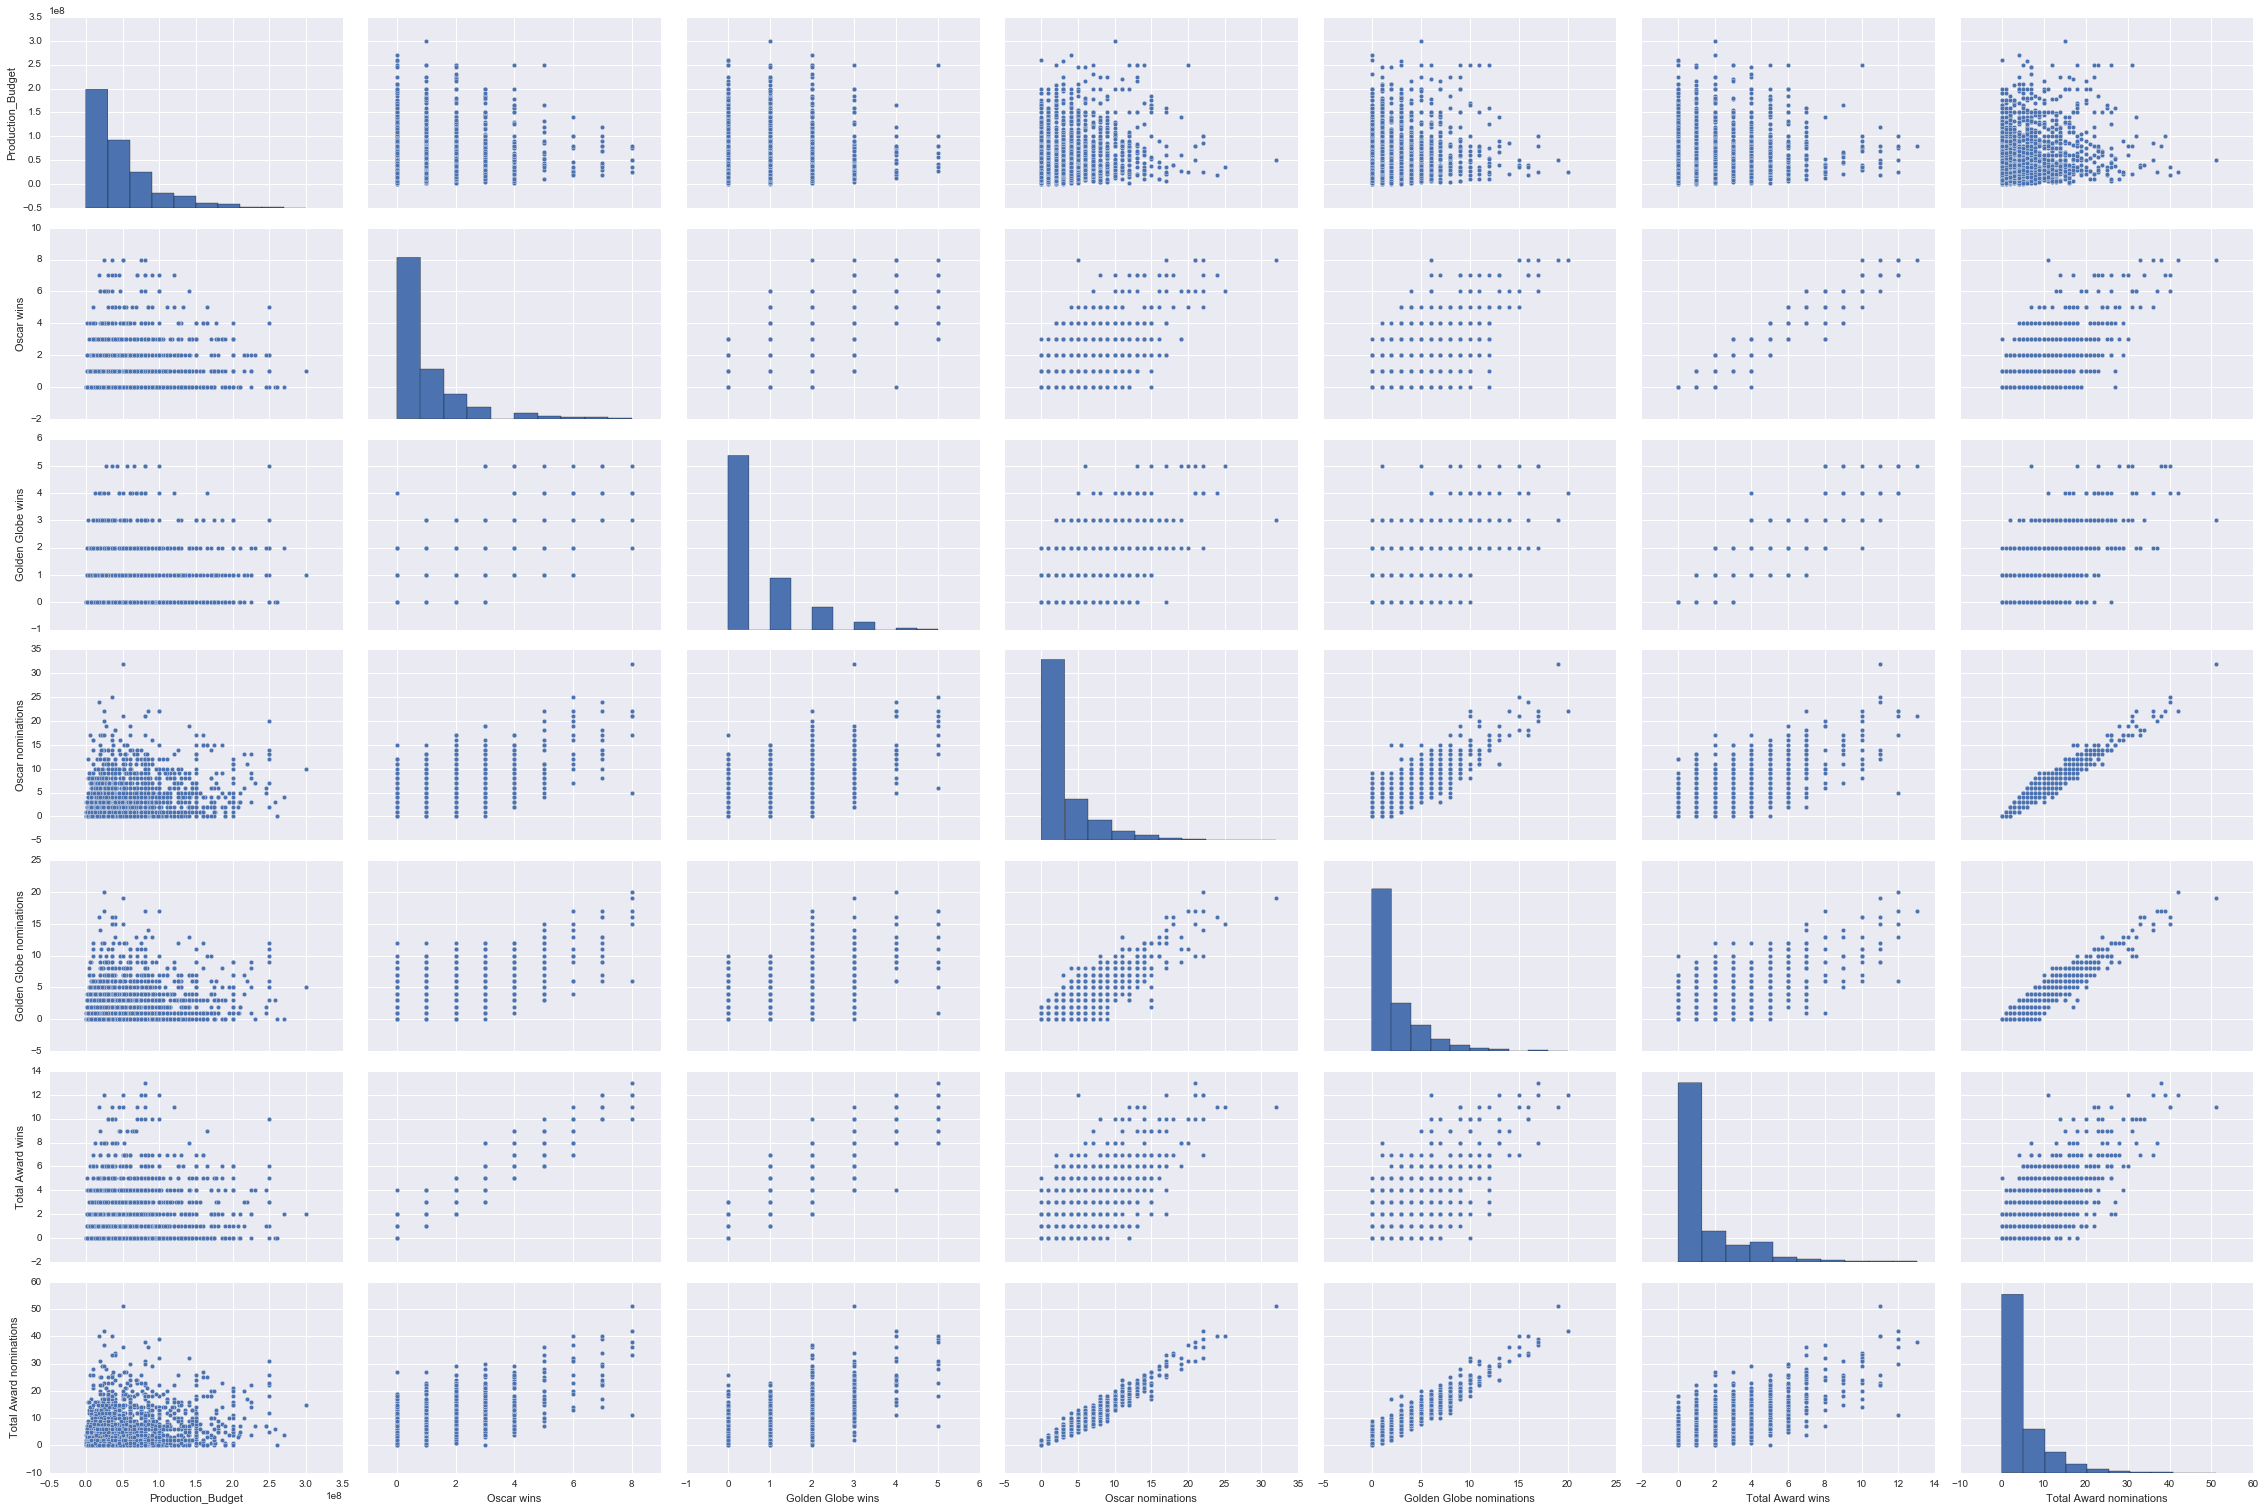

In [218]:
sns.pairplot(data_summed_final2, size = 3.0, aspect=1.5);

In [219]:
data_summed_final2.corr()

,Production_Budget,Oscar wins,Golden Globe wins,Oscar nominations,Golden Globe nominations,Total Award wins,Total Award nominations
Production_Budget,1.000000,0.207317,0.190403,0.269373,0.214306,0.213995,0.253802
Oscar wins,0.207317,1.000000,0.745494,0.720359,0.732181,0.956681,0.746364
Golden Globe wins,0.190403,0.745494,1.000000,0.702214,0.693545,0.907247,0.718978
Oscar nominations,0.269373,0.720359,0.702214,1.000000,0.884944,0.761311,0.980196
Golden Globe nominations,0.214306,0.732181,0.693545,0.884944,1.000000,0.764984,0.959641
Total Award wins,0.213995,0.956681,0.907247,0.761311,0.764984,1.000000,0.785043
Total Award nominations,0.253802,0.746364,0.718978,0.980196,0.959641,0.785043,1.000000


In [220]:
data_summed_final2.columns = ['Y','X1','X2','X3','X4','X5','X6']
data_summed_final2

,Y,X1,X2,X3,X4,X5,X6
0,30000000.0,0.0,0.0,0.0,0.0,0.0,0.0
1,85000000.0,0.0,0.0,3.0,5.0,0.0,8.0
2,8000000.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20000000.0,2.0,0.0,8.0,4.0,2.0,12.0
4,18000000.0,0.0,0.0,1.0,0.0,0.0,1.0
5,37000000.0,0.0,0.0,0.0,0.0,0.0,0.0
6,50000000.0,0.0,0.0,0.0,0.0,0.0,0.0
7,25000000.0,0.0,0.0,4.0,1.0,0.0,5.0
8,47000000.0,1.0,0.0,2.0,3.0,1.0,5.0
9,60000000.0,1.0,2.0,7.0,4.0,3.0,11.0


In [221]:
data_summed_final2.corr()['Y'].sort_values(ascending=False)

Y     1.000000
X3    0.269373
X6    0.253802
X4    0.214306
X5    0.213995
X1    0.207317
X2    0.190403
Name: Y, dtype: float64

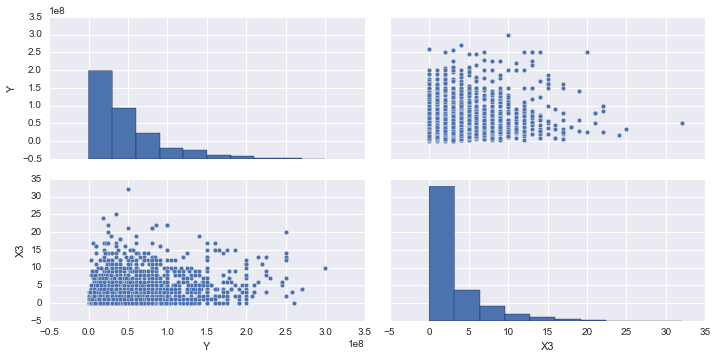

In [222]:
sns.pairplot(data_summed_final2[['Y','X3']], size = 2.5, aspect=2.0);


In [223]:
data_summed_final2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2444 entries, 0 to 2443
Data columns (total 7 columns):
Y     2444 non-null float64
X1    2444 non-null float64
X2    2444 non-null float64
X3    2444 non-null float64
X4    2444 non-null float64
X5    2444 non-null float64
X6    2444 non-null float64
dtypes: float64(7)
memory usage: 133.7 KB


In [224]:
data_summed_final2.columns = ['Y','X1','X2','X3','X4','X5','X6']
data_summed_final2
y, X = patsy.dmatrices('Y ~ X1 + X2 + X3 + (X3)**2 + X4', data=data_summed_final2, return_type="dataframe")
# Create your model
model = sm.OLS(y, X)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     50.53
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           6.41e-41
Time:                        17:19:58   Log-Likelihood:                -46485.
No. Observations:                2444   AIC:                         9.298e+04
Df Residuals:                    2439   BIC:                         9.301e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   4.025e+07   1.13e+06     35.557      0.000       3.8e+07  4.25e+07
X1          2.043e+06   1.19e+06      1.720      0.086     -2.87e+05  4.37e+06
X2         -2.725e+05   1.64e+06     -0.166      0.868     -3.48e+06  2.94e+06
X3          4.274e+06   5.31e+05      8.042      0.000      3.23e+06  5.32e+06
X4         -2.317e+06   7.59e+05     -3.053      0.002     -3.81e+06 -8.29e+05
==============================================================================
Omnibus:                      760.247   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2106.767
Skew:                           1.640   Prob(JB):                         0.00
Kurtosis:                       6.150   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [259]:
# Define the model
lm1 = smf.ols('Y ~ I(X3**2) + X3+ X4', data=data_summed_final2)
# Fit the model
fit1 = lm1.fit()
# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     81.59
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           2.68e-50
Time:                        23:50:47   Log-Likelihood:                -46466.
No. Observations:                2444   AIC:                         9.294e+04
Df Residuals:                    2440   BIC:                         9.296e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   3.654e+07   1.26e+06     28.975      0.000      3.41e+07   3.9e+07
I(X3 ** 2) -2.214e+05   3.39e+04     -6.540      0.000     -2.88e+05 -1.55e+05
X3          7.252e+06   6.59e+05     10.999      0.000      5.96e+06  8.55e+06
X4         -1.547e+06   7.19e+05     -2.151      0.032     -2.96e+06 -1.37e+05
==============================================================================
Omnibus:                      747.112   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2027.358
Skew:                           1.621   Prob(JB):                         0.00
Kurtosis:                       6.066   Cond. No.                         92.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [226]:
# STUDENT SECTION
# Define the model removing X2, X4, and X5
# Define the model
lm2 = smf.ols('Y ~ X1 + X2 + X3 + X4 + X5', data=data_summed_final2)
# Fit the model
fit2 = lm2.fit()
# Print summary statistics of the model's performance
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     50.53
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           6.41e-41
Time:                        17:20:03   Log-Likelihood:                -46485.
No. Observations:                2444   AIC:                         9.298e+04
Df Residuals:                    2439   BIC:                         9.301e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   4.025e+07   1.13e+06     35.557      0.000       3.8e+07  4.25e+07
X1          1.453e+06   1.15e+06      1.266      0.205     -7.97e+05   3.7e+06
X2         -8.627e+05   1.32e+06     -0.654      0.513     -3.45e+06  1.72e+06
X3          4.274e+06   5.31e+05      8.042      0.000      3.23e+06  5.32e+06
X4         -2.317e+06   7.59e+05     -3.053      0.002     -3.81e+06 -8.29e+05
X5          5.903e+05    5.1e+05      1.158      0.247     -4.09e+05  1.59e+06
==============================================================================
Omnibus:                      760.247   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2106.767
Skew:                           1.640   Prob(JB):                         0.00
Kurtosis:                       6.150   Cond. No.                     8.67e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.27e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

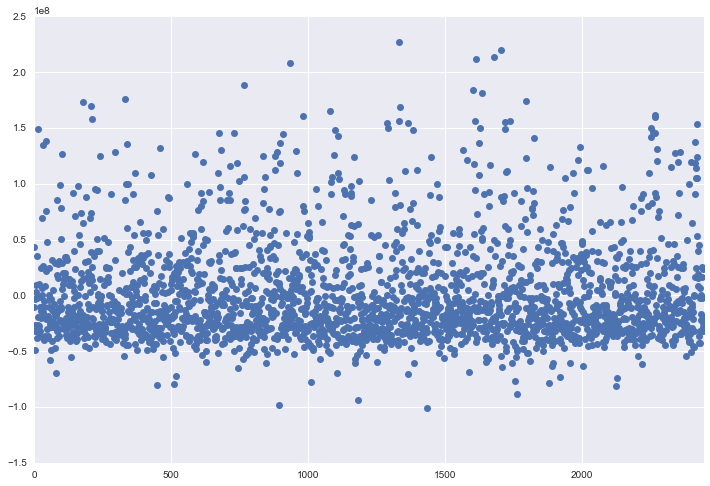

In [227]:
fit.resid.plot(style='o', figsize=(12,8));

In [228]:
# Create an empty model
lr = LinearRegression()
# Choose the predictor variables, here all but the first which is the response variable
# This model is analogous to the Y ~ X1 + X2 + X3 + X4 + X5 + X6 model
X = data_summed_final2.iloc[:, 1:5]
# Choose the response variable(s)
y = data_summed_final2.iloc[:, 0]
# Fit the model to the full dataset
lr.fit(X, y)
# Print out the R^2 for the model against the full dataset
lr.score(X,y)

0.076531252593725618

In [229]:
# STUDENT SECTION
# Create an empty model
lr = LinearRegression()
# Choose the predictor variables, here all but the first which is the response variable
X = data_summed_final2[['X1','X2','X3','X4']]
# Choose the response variable(s)
y = data_summed_final2['Y']
# Fit the model to the full dataset
lr.fit(X, y)
# Print out the R^2 for the model against the full dataset
lr.score(X,y)

0.076531252593725618

In [230]:
lr.intercept_
# print out other coefficients
lr.coef_

array([ 2043273.92241212,  -272486.53647967,  4273596.02267794,
       -2317360.78154506])

In [231]:
lsm = smf.ols('Y ~ X1 + X2 + X3 + (X3)**2 + X4', data = data_summed_final2)
fit1 = lsm.fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     50.53
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           6.41e-41
Time:                        17:20:09   Log-Likelihood:                -46485.
No. Observations:                2444   AIC:                         9.298e+04
Df Residuals:                    2439   BIC:                         9.301e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   4.025e+07   1.13e+06     35.557      0.0

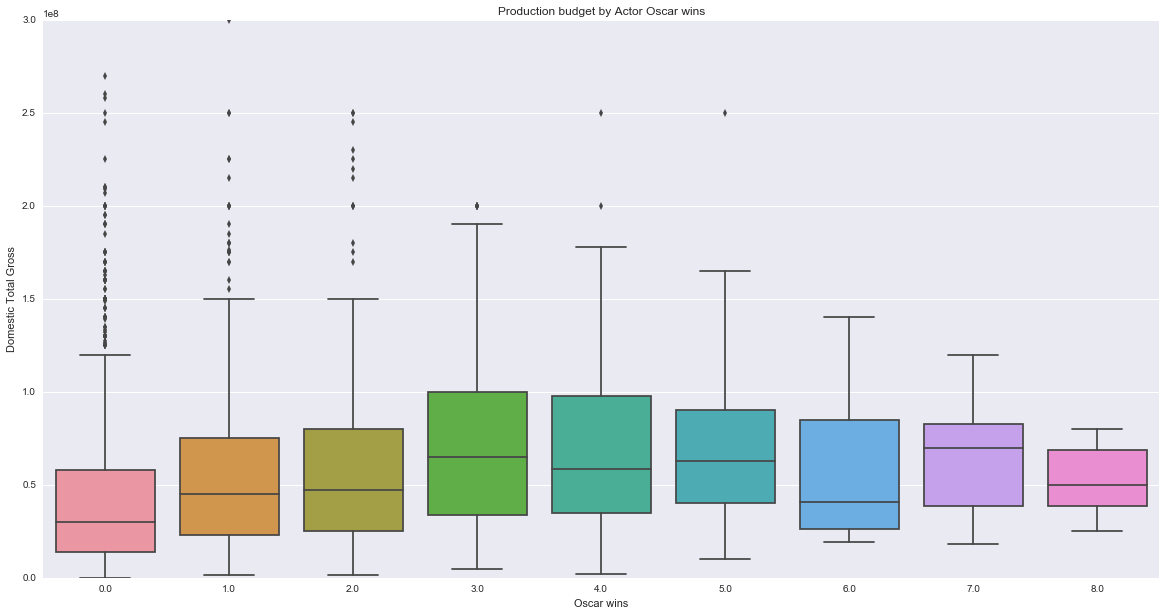

In [247]:

# Visualize some of the different variables against 'Domestic Total Gross'
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('Production budget by Actor Oscar wins')
# Create a seaborn boxplot of count by temperature ordered by temperature
sns.boxplot(x=data_summed_final2['X1'].sort_values(), y=data_summed_final2['Y'])
ax.set_xlabel('Oscar wins')
ax.set_ylabel('Domestic Total Gross')

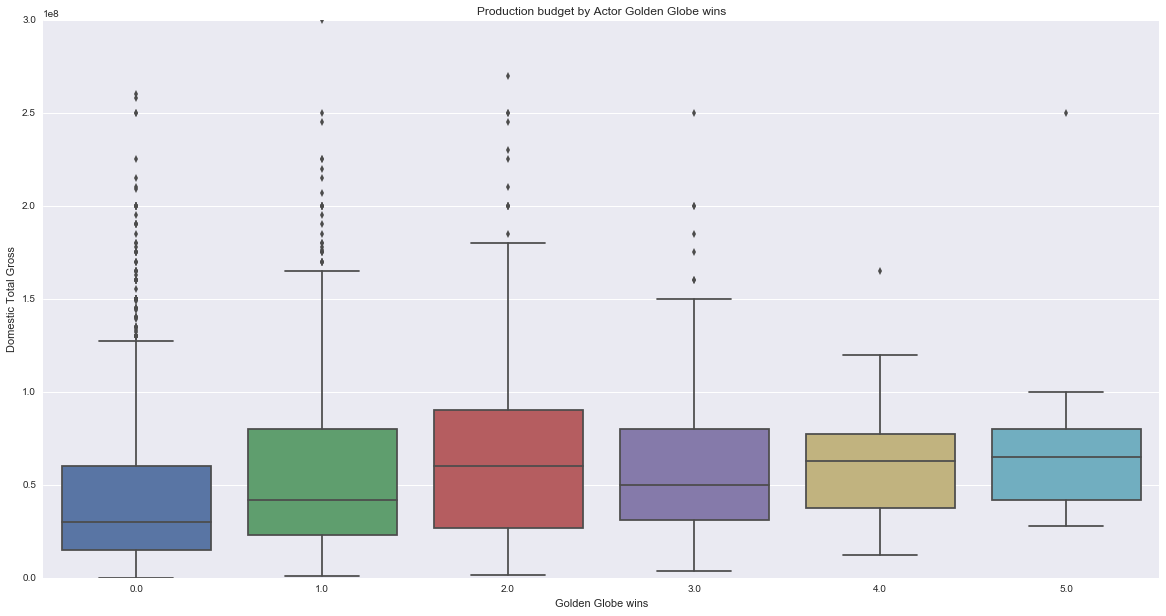

In [248]:
# Visualize some of the different variables against 'Domestic Total Gross'
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('Production budget by Actor Golden Globe wins')
# Create a seaborn boxplot of count by temperature ordered by temperature
sns.boxplot(x=data_summed_final2['X2'].sort_values(), y=data_summed_final2['Y'])
ax.set_xlabel('Golden Globe wins')
ax.set_ylabel('Domestic Total Gross')

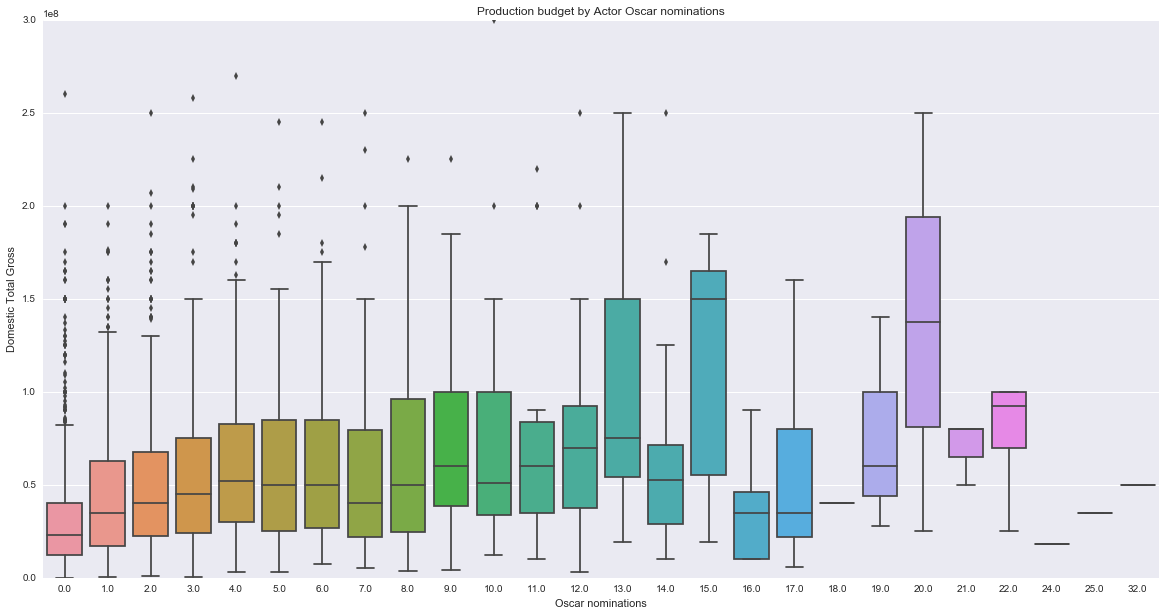

In [249]:
# Visualize some of the different variables against 'Domestic Total Gross'
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('Production budget by Actor Oscar nominations')
# Create a seaborn boxplot of count by temperature ordered by temperature
sns.boxplot(x=data_summed_final2['X3'].sort_values(), y=data_summed_final2['Y'])
ax.set_xlabel('Oscar nominations')
ax.set_ylabel('Domestic Total Gross')

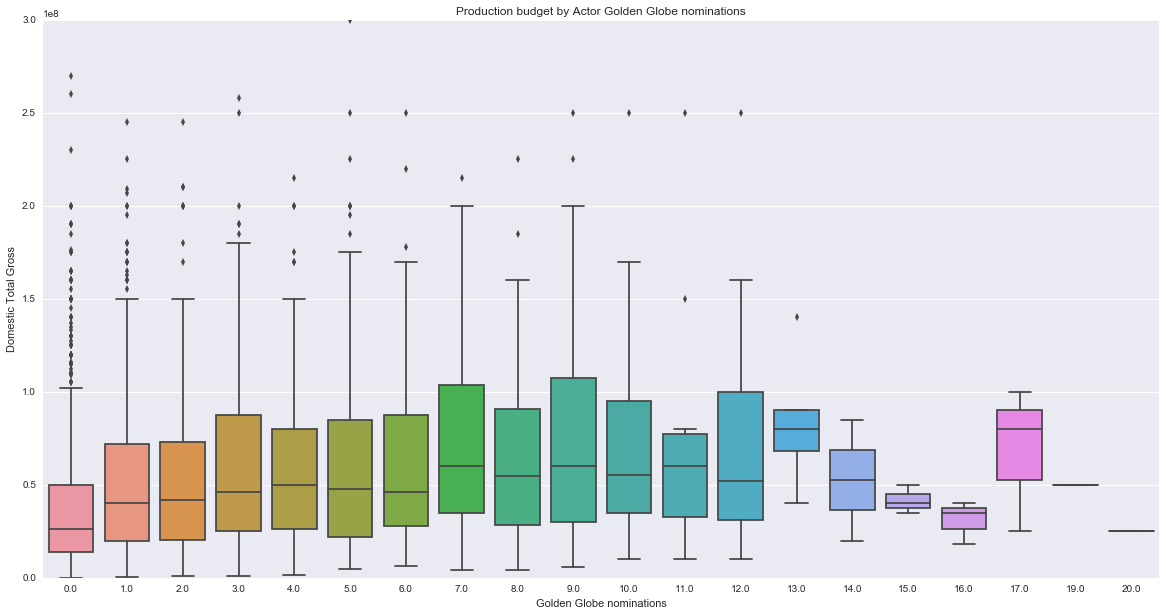

In [250]:
# Visualize some of the different variables against 'Domestic Total Gross'
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('Production budget by Actor Golden Globe nominations')
# Create a seaborn boxplot of count by temperature ordered by temperature
sns.boxplot(x=data_summed_final2['X4'].sort_values(), y=data_summed_final2['Y'])
ax.set_xlabel('Golden Globe nominations')
ax.set_ylabel('Domestic Total Gross')

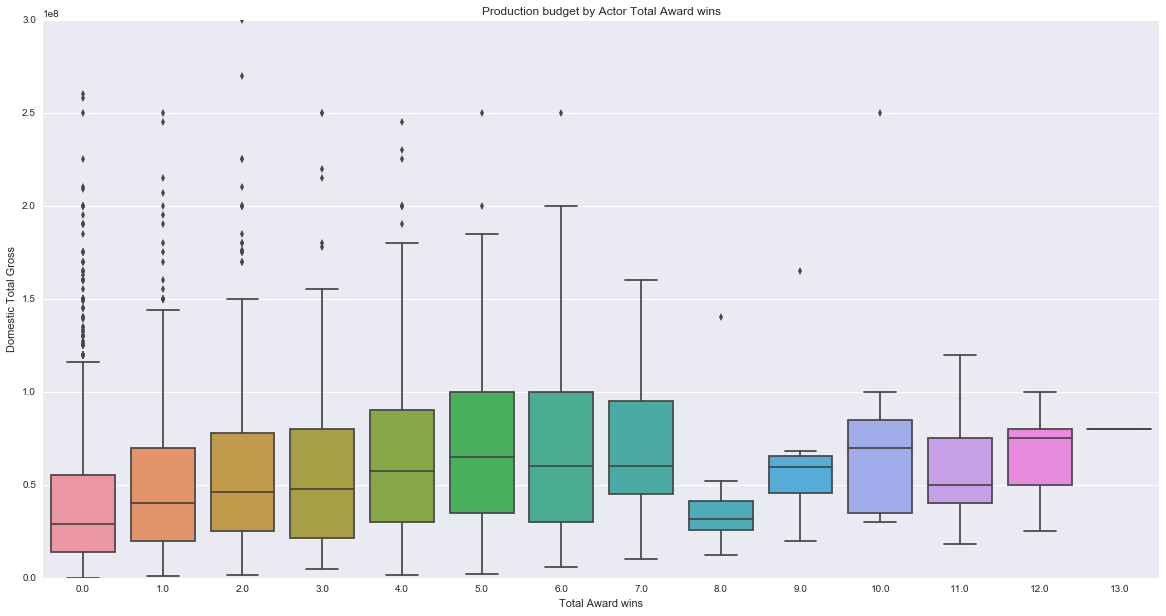

In [251]:
# Visualize some of the different variables against 'Domestic Total Gross'
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('Production budget by Actor Total Award wins')
# Create a seaborn boxplot of count by temperature ordered by temperature
sns.boxplot(x=data_summed_final2['X5'].sort_values(), y=data_summed_final2['Y'])
ax.set_xlabel('Total Award wins')
ax.set_ylabel('Domestic Total Gross')

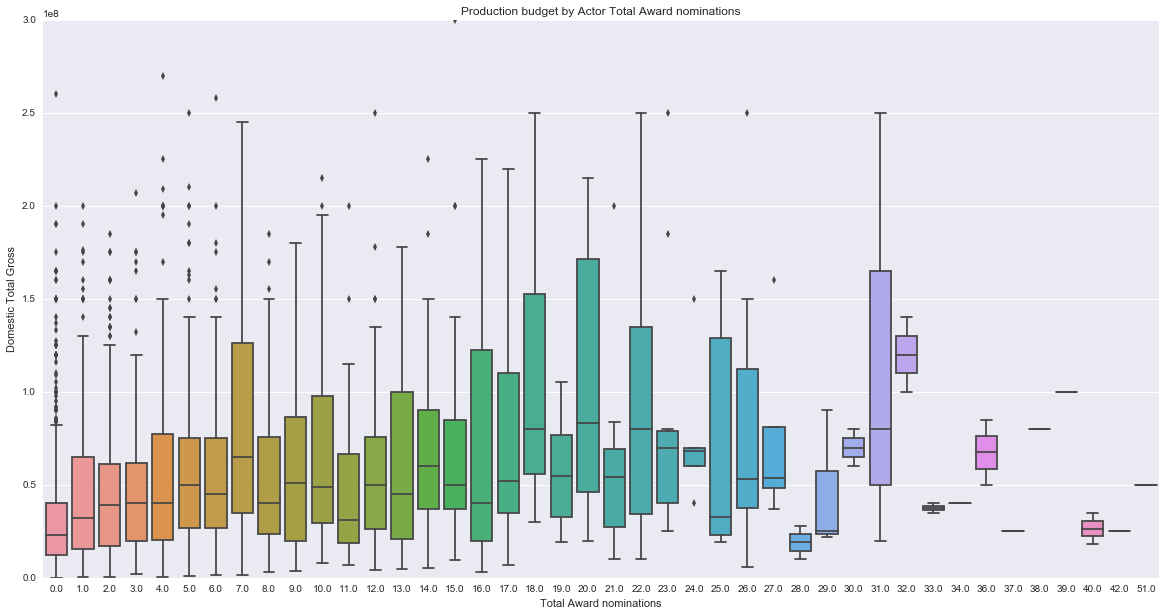

In [252]:
# Visualize some of the different variables against 'Domestic Total Gross'
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('Production budget by Actor Total Award nominations')
# Create a seaborn boxplot of count by temperature ordered by temperature
sns.boxplot(x=data_summed_final2['X6'].sort_values(), y=data_summed_final2['Y'])
ax.set_xlabel('Total Award nominations')
ax.set_ylabel('Domestic Total Gross')

In [238]:

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

In [239]:
# STUDENT SECTION
lr = LinearRegression()

X = data_summed_final2[['X1','X2','X3','X4']]

y = data_summed_final2['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [240]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.042534059050279072

In [241]:
from sklearn.linear_model import RidgeCV
rcv = RidgeCV(cv=10)
rcv.fit(X_train, y_train)
rcv.score(X_test, y_test)

0.0425440704733141

In [242]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.042534059050279072

In [243]:
from sklearn.linear_model import RidgeCV
rcv = RidgeCV(cv=10)

In [262]:
from sklearn.ensemble import RandomForestRegressor
X = data_summed_final2[['X3']]
y = data_summed_final2['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = RandomForestRegressor()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.082245966546708127

In [245]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

X = data_summed_final2[['X1','X2','X3','X4']]
y = data_summed_final2['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
est = GradientBoostingRegressor(learning_rate=0.1,
     max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)
mean_squared_error(y_test, est.predict(X_test)) 

1552996469462771.8

In [246]:
from sklearn.kernel_ridge import KernelRidge
import numpy as np
n_samples, n_features = 10, 5
#rng = np.random.RandomState(0)
y = data_summed_final2[['X1','X2','X3','X4']]
X = data_summed_final2['Y']
clf = KernelRidge(alpha=1.0)
clf.fit(X_train, y_train) 

KernelRidge(alpha=1.0, coef0=1, degree=3, gamma=None, kernel='linear',
            kernel_params=None)
clf.score(X_test, y_test) 

-0.42485295485270869